<a href="https://colab.research.google.com/github/NatashaSikinyi/Financial-Inclusion/blob/main/Moringa_Data_Science_Core_Independent_Project_Wk7_2022_05_Natasha_Sikinyi_Resubmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Financial Inclusion In East Africa**

---


**Project Objective**

To figure out how to predict the individuals who are most likely to have and use a bank account


**Metric for Success**

Identify and select the features which can describe the characteristics of the group of individuals that are most likely to have or use a bank account.


**Context**

The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

**Experimental Design taken**

The following are the steps taken in this analysis;



1.   Loading dataset and appropriate libraries
2.   Taking the necessary steps to clean the data
3.   Carrying out univariate, bivariate and multivariate data analysis while dealing with any outliers and anomalies
4.   Provide observation and recommendations on suitability of each of the tested models on solving the given challenge





**Appropriatness of available data**

 The data given contains financial data with 13 columns and 23524 rows and is approriate for my analysis

## **Importing Libraries**

In [113]:
import pandas as pd
import numpy as np
import seaborn as sn;sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## **Loading the Data**

In [ ]:
#loading the data
FinData = pd.read_csv('http://bit.ly/FinancialDataset')
FinData

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## **Checking the Data**

In [ ]:
#determing the number of records in our dataset

FinData.shape

(23524, 13)

In [ ]:
#checking for appropriate data type

FinData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
#describing our data

FinData.describe()

               year  household_size  Respondent Age
count  23524.000000    23496.000000    23490.000000
mean    2016.979000        3.681818       38.804300
std        0.899669        2.279933       16.519996
min     2016.000000        0.000000       16.000000
25%     2016.000000        2.000000       26.000000
50%     2017.000000        3.000000       35.000000
75%     2018.000000        5.000000       49.000000
max     2056.000000       21.000000      100.000000


In [ ]:
#inspecting the columns

FinData.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
#checking for missing values

FinData.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

## **Tidying the Dataset**

In [ ]:
#Dropping missing values
FinData = FinData.dropna()

#veryfing that  there are no missing values
FinData.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
#renaming the misspelled words in the colums

FinData.rename(columns = {'The relathip with head': 'The relationship with head', 'Level of Educuation': 'Level of Education', 'Respondent Age': 'Age'}, inplace = True)

#veryfying
FinData.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Age', 'gender_of_respondent',
       'The relationship with head', 'marital_status', 'Level of Education',
       'Type of Job'],
      dtype='object')

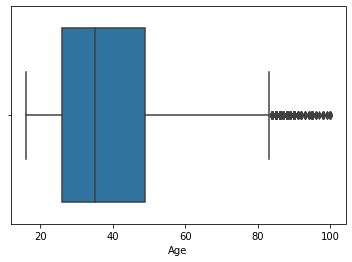

In [ ]:
#checking for outliers

#age of the respondents

sns.boxplot(x=FinData['Age'])
plt.show()

respondents between the age range of 25 and 50 have bank accounts as compared to other ages


In [ ]:
#checking for anomalies

print(FinData.nunique())

country                          4
year                             6
uniqueid                      8687
Has a Bank account               2
Type of Location                 2
Cell Phone Access                2
household_size                  21
Age                             85
gender_of_respondent             2
The relationship with head       6
marital_status                   5
Level of Education               7
Type of Job                     10
dtype: int64


In [ ]:
q1_age = FinData['household_size'].quantile(.25)
q3_age = FinData['household_size'].quantile(.75)
iqr_age = q3_age - q1_age

q1_size = FinData['Age'].quantile(.25)
q3_size = FinData['Age'].quantile(.75)
iqr_size = q3_size - q1_size

q1_year = FinData['year'].quantile(.25)
q3_year = FinData['year'].quantile(.75)
iqr_year = q3_year - q1_year

print(iqr_age,iqr_size,iqr_year)

3.0 23.0 2.0


## **Exploratory Data Analysis**

###**Univariate Analysis**

In [71]:
#descriptive analysis

#the most common number in every household

FinData["household_size"].mode()

0    2.0
dtype: float64

In [72]:
#the median age of respondants

FinData["Age"].median()

35.0

In [73]:
#the average age of all respondants

FinData["Age"].mean()

38.80550914621085

In [74]:
#Measure of dispersion

#the skewness of the respondent's age

FinData["Age"].skew()

0.840661747532081

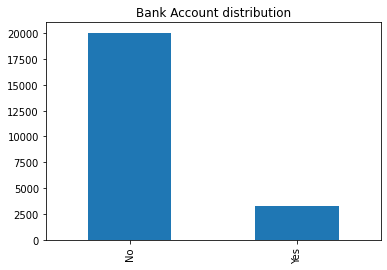

In [75]:
FinData['Has a Bank account'].value_counts().plot.bar(title="Bank Account distribution")

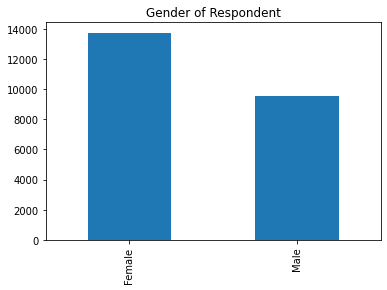

In [76]:
FinData['gender_of_respondent'].value_counts().plot.bar(title="Gender of Respondent")

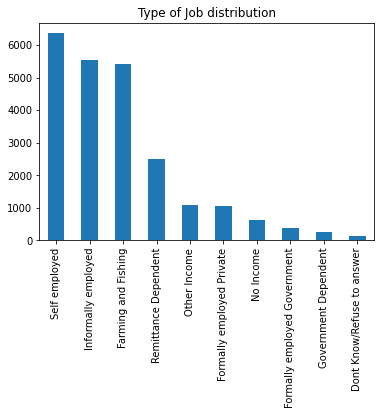

In [77]:
FinData['Type of Job'].value_counts().plot.bar(title="Type of Job distribution")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


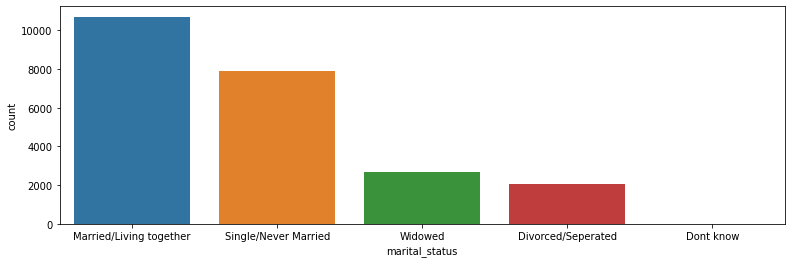

In [78]:
plt.figure(figsize=(13, 4))
sns.countplot(FinData.marital_status.dropna(), order = FinData.marital_status.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


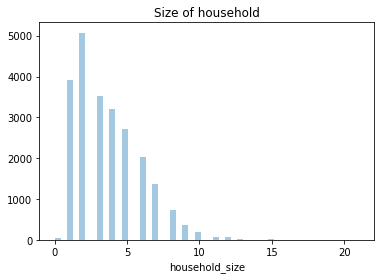

In [79]:
sns.distplot(FinData.household_size, kde=False)
plt.title('Size of household')
plt.show();

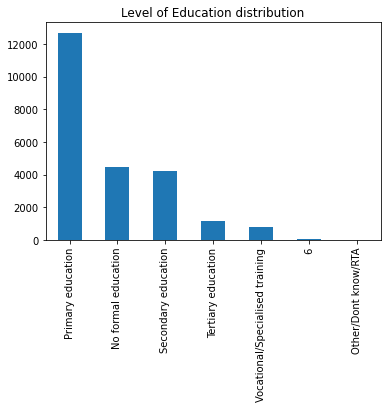

In [80]:
FinData['Level of Education'].value_counts().plot.bar(title="Level of Education distribution")

In [82]:
#Filtering data from the dataset

#Kenya
ke = FinData[FinData['country']=='Kenya']
ke

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,The relationship with head,marital_status,Level of Education,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Kenya,2018,uniqueid_6067,No,Rural,Yes,4.0,26.0,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
6064,Kenya,2018,uniqueid_6068,No,Urban,No,5.0,17.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6065,Kenya,2018,uniqueid_6069,No,Rural,Yes,9.0,30.0,Female,Spouse,Married/Living together,No formal education,Farming and Fishing
6066,Kenya,2018,uniqueid_6070,No,Rural,Yes,3.0,52.0,Male,Head of Household,Married/Living together,Primary education,Self employed


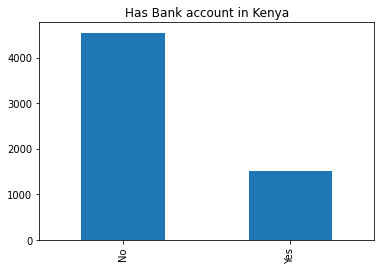

In [95]:
ke['Has a Bank account'].value_counts().plot.bar(title="Has Bank account in Kenya")

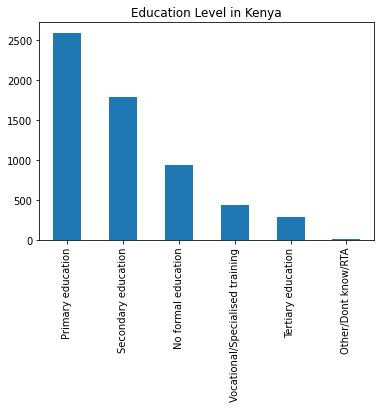

In [96]:
ke['Level of Education'].value_counts().plot.bar(title="Education Level in Kenya")

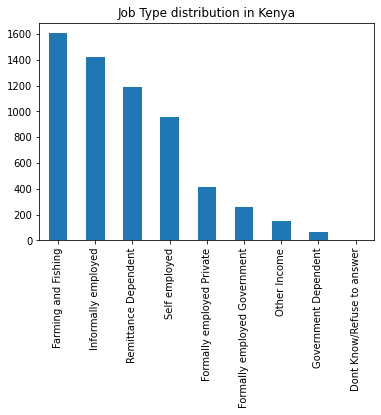

In [93]:
ke['Type of Job'].value_counts().plot.bar(title="Job Type distribution in Kenya")

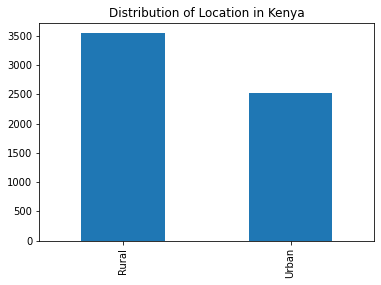

In [97]:
ke['Type of Location'].value_counts().plot.bar(title="Distribution of Location in Kenya")

**Observations**

A larger part of the respondants do not own bank accounts in Kenya

Most of the respondents have primary level of education followed by secondary

Most of the respondants in Kenya are farmers and/or fisherpeople while the least are government dependant

A larger number of the respondants live in the rural areas.


In [98]:
#Tanzania
tz = FinData[FinData['country']=='Tanzania']
tz

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,The relationship with head,marital_status,Level of Education,Type of Job
14803,Tanzania,2017,uniqueid_1,No,Rural,Yes,1.0,22.0,Female,Child,Divorced/Seperated,Secondary education,No Income
14804,Tanzania,2017,uniqueid_2,No,Urban,No,2.0,100.0,Male,Head of Household,Single/Never Married,No formal education,Self employed
14805,Tanzania,2017,uniqueid_3,No,Urban,Yes,3.0,19.0,Female,Head of Household,Widowed,No formal education,No Income
14806,Tanzania,2017,uniqueid_4,No,Urban,No,4.0,21.0,Female,Parent,Single/Never Married,Primary education,Remittance Dependent
14807,Tanzania,2017,uniqueid_5,Yes,Urban,Yes,3.0,24.0,Female,Parent,Divorced/Seperated,Tertiary education,Formally employed Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21418,Tanzania,2017,uniqueid_6633,No,Rural,No,2.0,25.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
21419,Tanzania,2017,uniqueid_6634,No,Urban,Yes,2.0,52.0,Male,Head of Household,Single/Never Married,Primary education,Self employed
21420,Tanzania,2017,uniqueid_6635,No,Rural,No,5.0,16.0,Female,Other non-relatives,Divorced/Seperated,Primary education,Formally employed Private
21421,Tanzania,2017,uniqueid_6636,No,Urban,Yes,2.0,48.0,Male,Head of Household,Single/Never Married,Primary education,Self employed


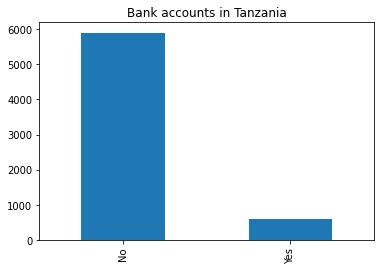

In [99]:
tz['Has a Bank account'].value_counts().plot.bar(title="Bank accounts in Tanzania")

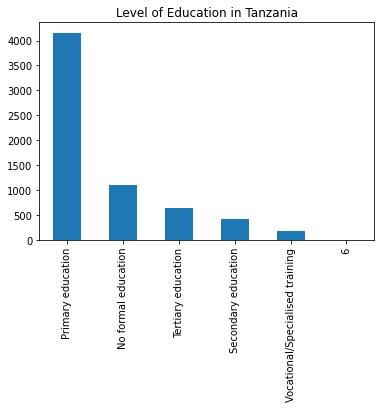

In [100]:
tz['Level of Education'].value_counts().plot.bar(title="Level of Education in Tanzania")

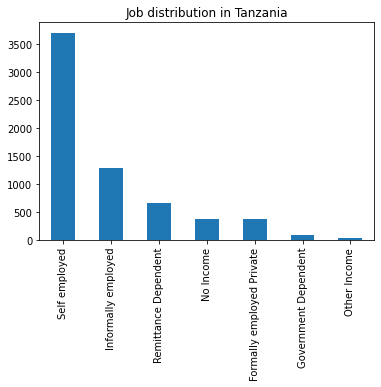

In [102]:
tz['Type of Job'].value_counts().plot.bar(title="Job distribution in Tanzania")

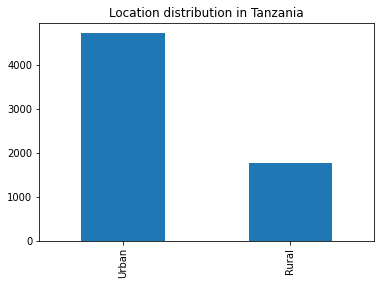

In [101]:
tz['Type of Location'].value_counts().plot.bar(title="Location distribution in Tanzania")

**Observations**

A very large number of respondents do not have bank accounts in Tanzania

More respondants from Tanzania have tertiary education than secondary education as compared to Kenya

Most respondants in Tanzania are self employed

A greater number of respondants from Tanzania hail from urban regions



In [106]:
#Uganda
ug = FinData[FinData['country']=='Uganda']
ug

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,The relationship with head,marital_status,Level of Education,Type of Job
21423,Uganda,2018,uniqueid_1,No,Rural,No,5.0,32.0,Female,Head of Household,Divorced/Seperated,Primary education,Other Income
21424,Uganda,2018,uniqueid_2,No,Urban,Yes,8.0,65.0,Female,Head of Household,Widowed,Secondary education,Self employed
21425,Uganda,2018,uniqueid_3,No,Rural,No,7.0,35.0,Female,Spouse,Married/Living together,Primary education,Self employed
21426,Uganda,2018,uniqueid_4,No,Rural,No,3.0,25.0,Female,Spouse,Married/Living together,Primary education,Other Income
21427,Uganda,2018,uniqueid_5,No,Urban,Yes,9.0,18.0,Female,Parent,Single/Never Married,Secondary education,Other Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


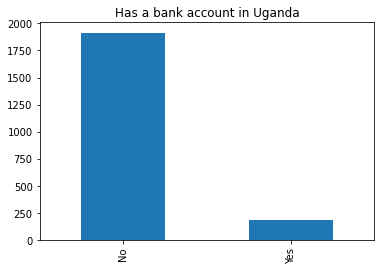

In [110]:
ug['Has a Bank account'].value_counts().plot.bar(title="Has a bank account in Uganda")

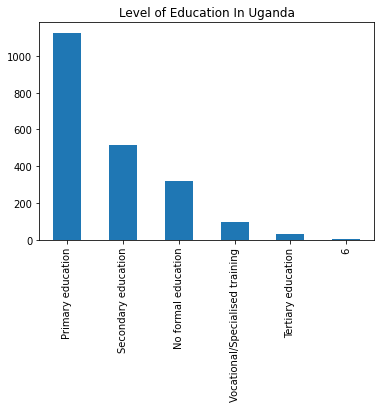

In [107]:
ug['Level of Education'].value_counts().plot.bar(title="Level of Education In Uganda")

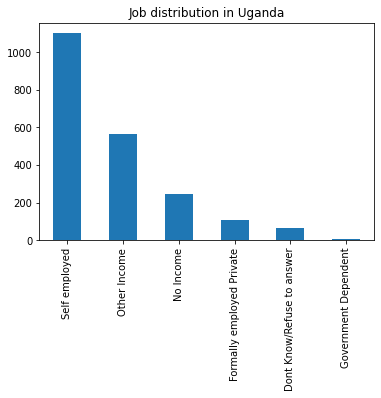

In [108]:
ug['Type of Job'].value_counts().plot.bar(title="Job distribution in Uganda")

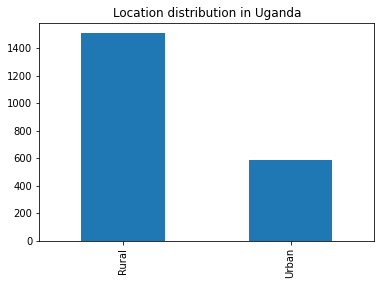

In [109]:
ug['Type of Location'].value_counts().plot.bar(title="Location distribution in Uganda")

**Observation**


An extreme number of the respondants from Uganda do not have bank accounts

More respondants from Uganda pursue vocational training than tertiary education

Most of the respondants from Uganda are self-employed

Most of the respondants from Uganda come from the rural regions

### **Bivariate Analysis**

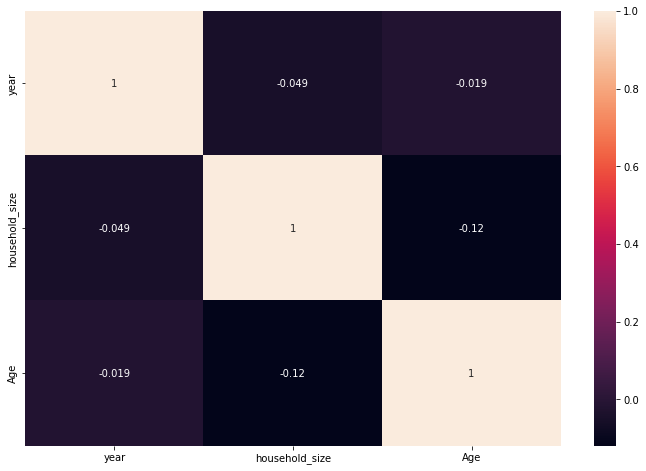

In [ ]:
#creating a corelation matrix

plt.figure(figsize=(12, 8))

FinData_corr = FinData.corr()
sns.heatmap(FinData_corr, 
            xticklabels = FinData_corr.columns.values,
            yticklabels =FinData_corr.columns.values,
            annot = True);

<Figure size 1800x3600 with 0 Axes>

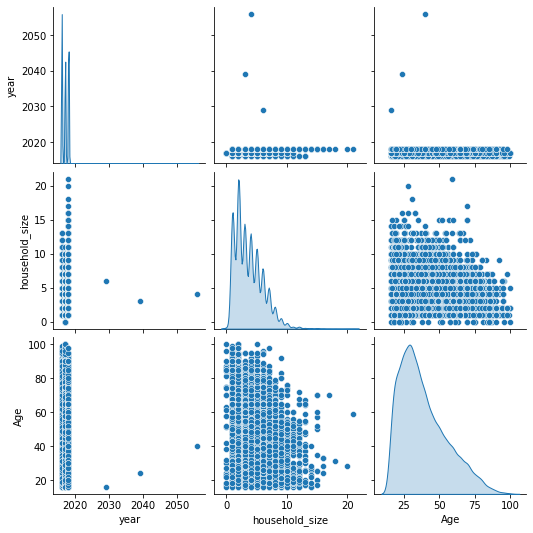

In [112]:
plt.figure(figsize=(25,50))

sns.pairplot(FinData, diag_kind='kde')

the correlations are weak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'Distribution of type of job against bank account')

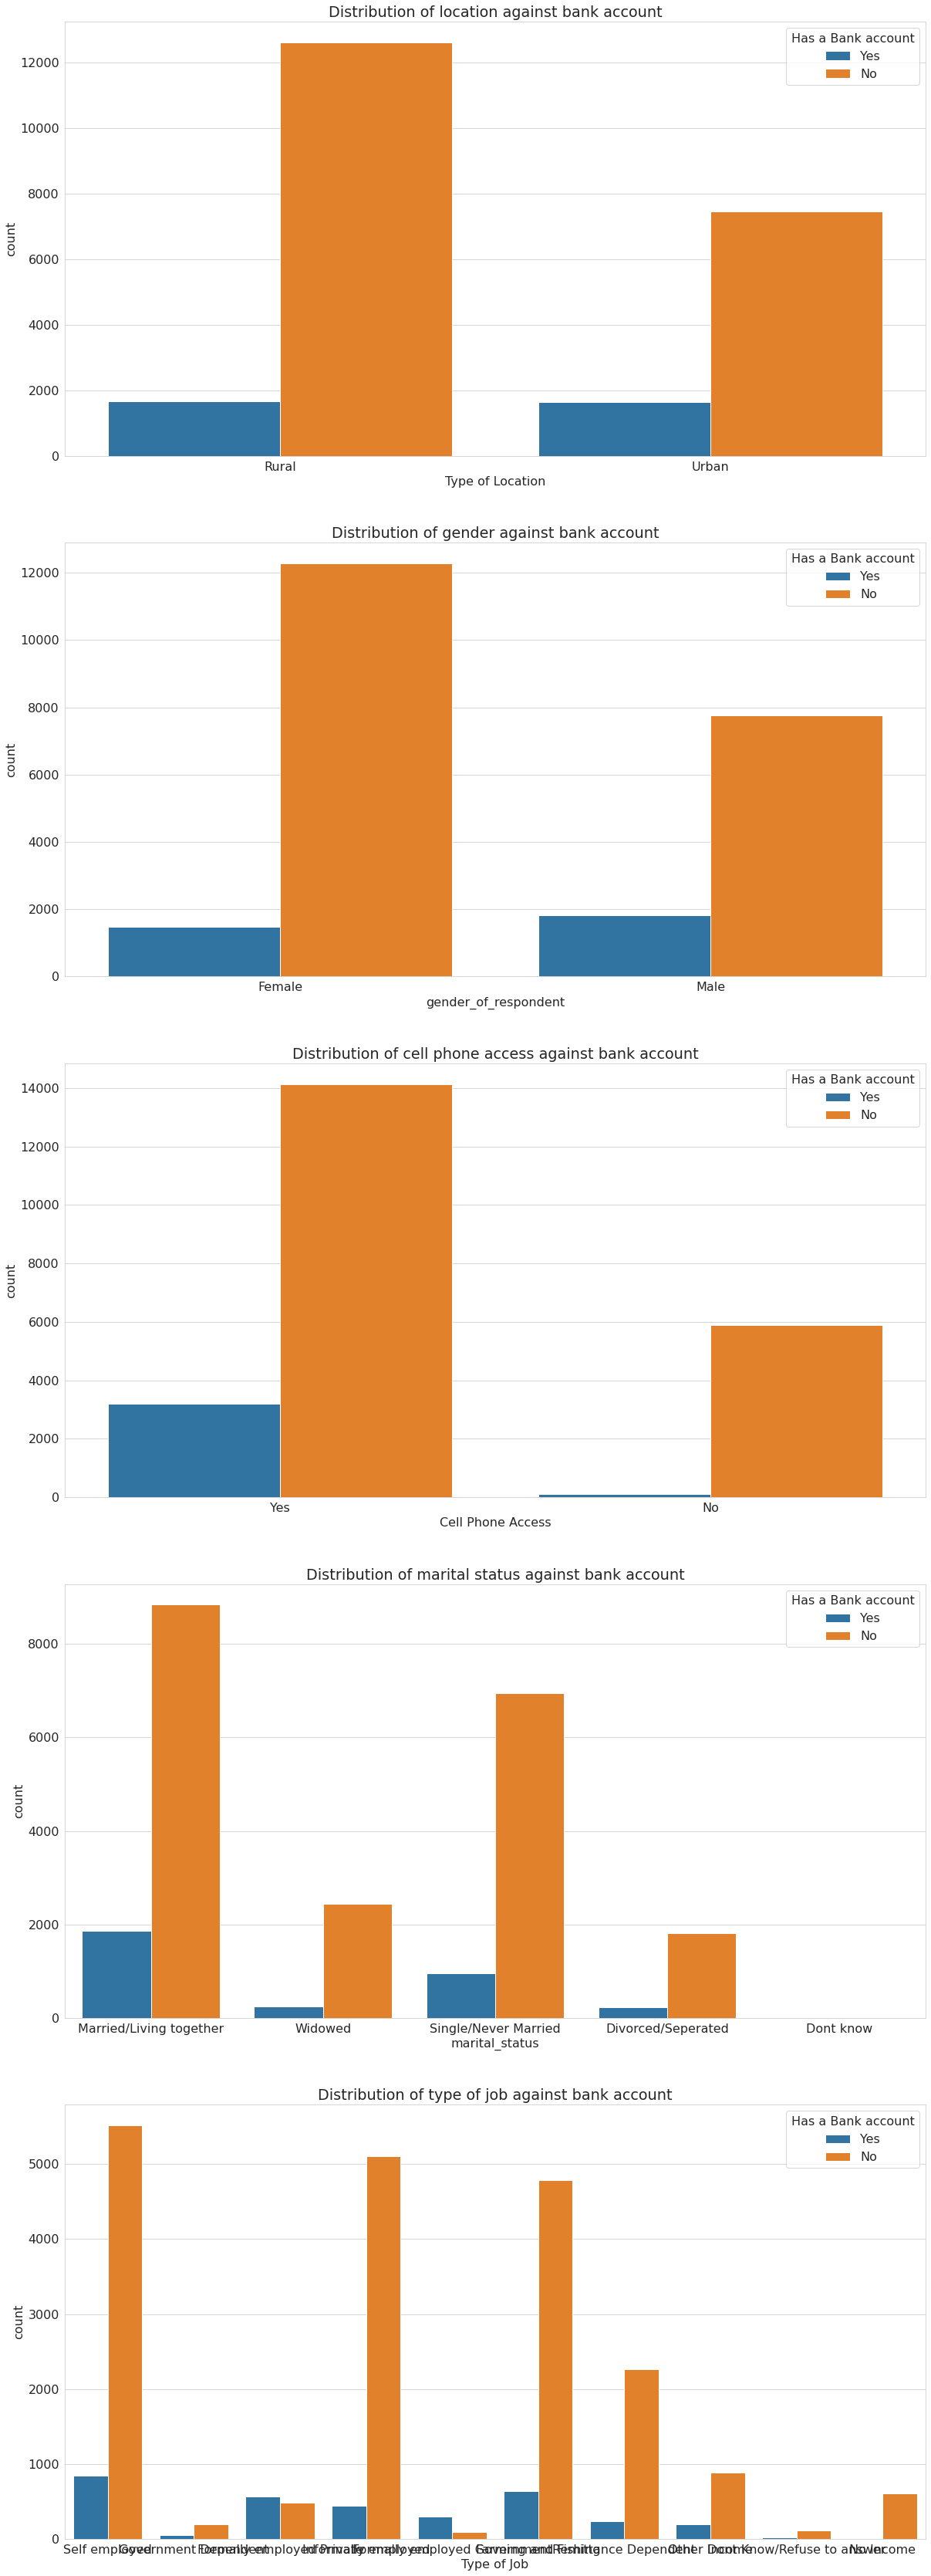

In [119]:
#creating countplots for each column with the bank account column since it is our target column

f, axes = plt.subplots(5, 1, figsize=[20,60])

plt.rcParams['font.size'] = '16'
sns.countplot('Type of Location', hue= 'Has a Bank account', data=FinData, ax=axes[0])
sns.countplot('gender_of_respondent', hue= 'Has a Bank account', data=FinData, ax=axes[1])
sns.countplot('Cell Phone Access', hue= 'Has a Bank account', data=FinData, ax=axes[2])
sns.countplot('marital_status', hue= 'Has a Bank account', data=FinData, ax=axes[3])
sns.countplot('Type of Job', hue= 'Has a Bank account', data=FinData, ax=axes[4])

#adding titles to the plot

axes[0].set_title("Distribution of location against bank account")
axes[1].set_title("Distribution of gender against bank account")
axes[2].set_title("Distribution of cell phone access against bank account")
axes[3].set_title("Distribution of marital status against bank account")
axes[4].set_title("Distribution of type of job against bank account")


**Observations**

Respondants from urban areas have slighty more bank accounts than those in rural areas since most industries, companies, offices and jobs in general are located in the urban areas

Respondants who are married are likely to have bank accounts, followed by those who are single. This may be due to the fact that married couples bring in income from two resources while single people do not have that many needs

People who are self employed have the lowest demographic of people with bank accounts as they put the money earned into their businesses


### **Multivariate Analysis**

**Linear Discriminant Analysis**

In [124]:
#Separating target label of users with bank accounts from other features

feat = FinData.drop(['Has a Bank account', 'country', 'year', 'uniqueid' ], 1)
bank_label = FinData['Has a Bank account']
feat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Type of Location,Cell Phone Access,household_size,Age,gender_of_respondent,The relationship with head,marital_status,Level of Education,Type of Job
0,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...
23519,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [135]:
#create an instant from LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda_= lda.fit(feat, bank_label)
lda_feat = lda_.transform()

#display coefficients of the reducted column
lda_.coef_

In [136]:
#create a dataframe to extract the names of the columns since the coefficients are in an array

f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

## **Conclusions**

From our analysis , it is safe to conclude that we can use linear combination of the following features to comfortably predict if an individual has a bank account



*   Cell Phone access
*   Level of Education
*   Responent_Age
*   gender_of_respondent
*   Type of location 



## **Recommendations**


More resources should be put into rural areas of all countries so as to increase the financial inclusion of more East African citizens.

Fintech companies should have special saving groups for young youth, married couples, women and self-employed/business owners as these are the target people for credit worthiness.

For the general economic growth, the education sector must improve the sensitization on financial literacy from primary school since a large number of people complete primary school.
